In [1]:
from astroscrappy import detect_cosmics
import numpy as np
import matplotlib.pyplot as plt
import math
#import pyraf
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from astropy.wcs import wcs
from astropy.visualization import quantity_support
from scipy.ndimage import uniform_filter1d
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from matplotlib.transforms import Bbox

import spectools as st

quantity_support()
%matplotlib inline

In [2]:
loc = 'data/'
fin = 'fin.ms'
sig = 'sig.ms'
mrkim = 'mrk'
ledaim = 'leda'
im012 = '012'
im013 = '013'
s8im = 's8'
s10im = 's10'
ext = '.fits'

data_mrk = fits.getdata(loc+mrkim+fin+ext)
header_mrk = fits.getheader(loc+mrkim+fin+ext)
data_mrksig = fits.getdata(loc+mrkim+sig+ext)
header_mrksig = fits.getheader(loc+mrkim+sig+ext)

data_012 = fits.getdata(loc+im012+fin+ext)
header_012 = fits.getheader(loc+im012+fin+ext)
data_012sig = fits.getdata(loc+im012+sig+ext)
header_012sig = fits.getheader(loc+im012+sig+ext)

data_leda = fits.getdata(loc+ledaim+fin+ext)
header_leda = fits.getheader(loc+ledaim+fin+ext)
data_ledasig = fits.getdata(loc+ledaim+sig+ext)
header_ledasig = fits.getheader(loc+ledaim+sig+ext)

data_013 = fits.getdata(loc+im013+fin+ext)
header_013 = fits.getheader(loc+im013+fin+ext)
data_013sig = fits.getdata(loc+im013+sig+ext)
header_013sig = fits.getheader(loc+im013+sig+ext)

data_s8 = fits.getdata(loc+s8im+fin+ext)
header_s8 = fits.getheader(loc+s8im+fin+ext)
data_s8sig = fits.getdata(loc+s8im+sig+ext)
header_s8sig = fits.getheader(loc+s8im+sig+ext)

data_s10 = fits.getdata(loc+s10im+fin+ext)
header_s10 = fits.getheader(loc+s10im+fin+ext)
data_s10sig = fits.getdata(loc+s10im+sig+ext)
header_s10sig = fits.getheader(loc+s10im+sig+ext)

linelist = np.genfromtxt(loc+'linelist.csv', delimiter=',',dtype=None, encoding=None)
linenames = np.genfromtxt(loc+'linenames.csv', delimiter=',',dtype=None, encoding=None)


Ha = 6562.819

expected_lines = {
    'Hb': 4861.333,
    'OIII_4959': 4958.911,
    'OIII_5007': 5006.843,
    'NII_6548': 6548.05,
    'Ha': 6562.819,
    'NII_6583': 6583.46,
    'SII_6716': 6716.44,
    'SII_6731': 6730.81
}

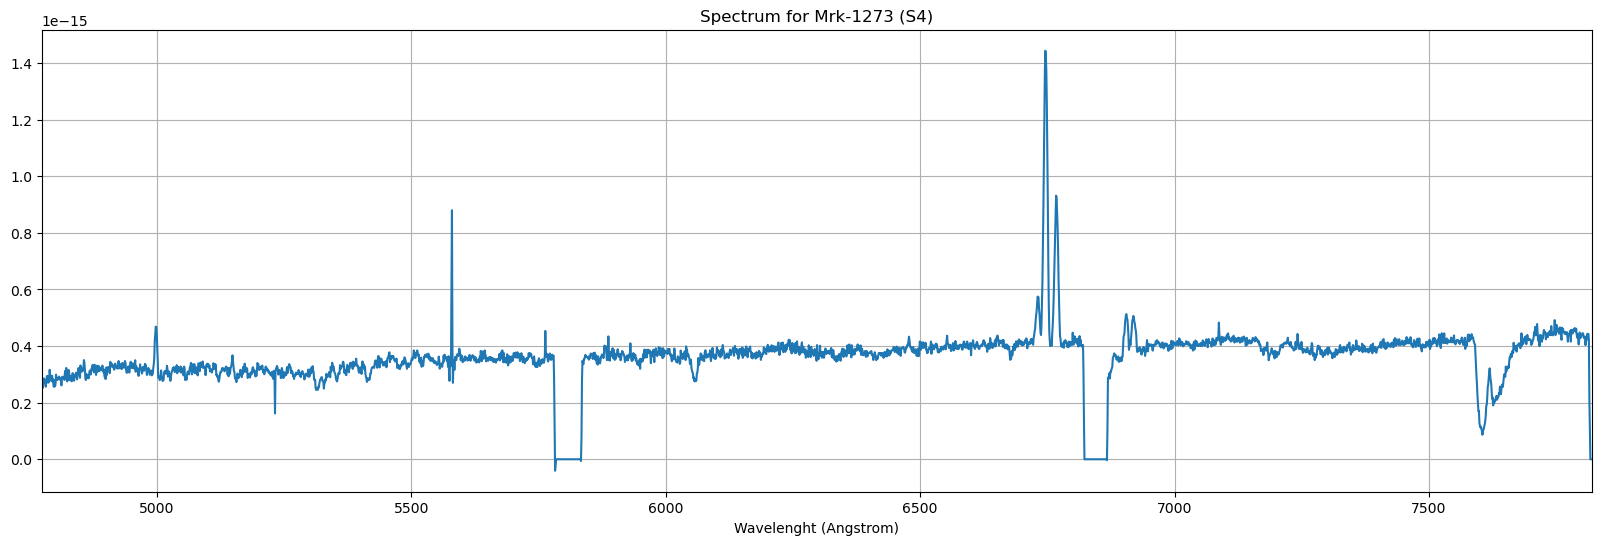

In [3]:
l=np.linspace(4774, 7820, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_mrk)
plt.title("Spectrum for Mrk-1273 (S4)")
plt.xlabel("Wavelenght (Angstrom)")
plt.xlim(l[0], l[3171])
plt.grid()

#plt.savefig('013spec.pdf',  bbox_inches='tight')

[S II] λ6716: flux = 1.33e-15
[S II] λ6731: flux = 1.34e-15
Hα flux: 8.78e-15
[N II] λ6548 flux: 1.43e-15
[N II] λ6583 flux: 4.28e-15
0.027922798250639327


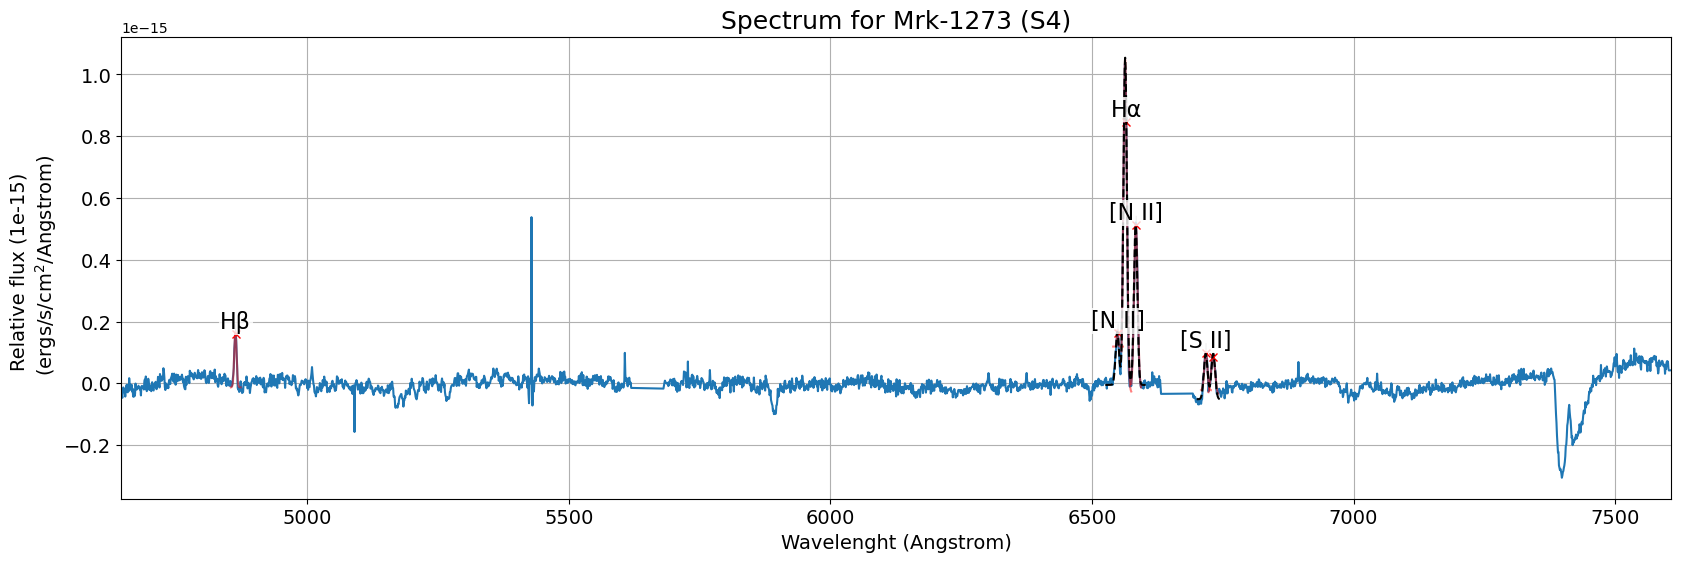

In [5]:
gal = np.copy(data_mrk)
sigma = np.copy(data_mrksig)

real,galnorm,snr,z,noise = st.normz(gal,sigma,l,expected_lines)


sn_threshold = 6
line_peaks, line_properties = find_peaks(snr, height=sn_threshold, prominence=1.0,width=5) 

abs_snr = -(snr)  # Negative SNR dips become peaks

# Find dips that look like absorption lines
abs_peaks, abs_properties = find_peaks(abs_snr, height=sn_threshold, prominence=1.0, width=5)


for i in range(len(real)):
    if real[i] > 5426 and real[i]< 5428:
        galnorm[i] = 0

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(real, galnorm)
#ax.plot(real, snr)
#ax.plot(real, abs_snr)
#ax.plot(real, noise)
st.plotpeaks(ax,real, galnorm, line_peaks,linenames, linelist)
#plotpeaks(real, galnorm, abs_peaks)
st.dogauss(real, galnorm, line_peaks)
    
ax.set_xlim(real[0], real[-1])
plt.title("Spectrum for Mrk-1273 (S4)", fontsize = 18)
ax.tick_params(axis='both', labelsize=14)
plt.xlabel("Wavelenght (Angstrom)", fontsize = 14)
plt.ylabel('Relative flux (1e-15) \n (ergs/s/cm$^2$/Angstrom)', fontsize = 14)
plt.grid();
#plt.savefig('S4spec.png',  bbox_inches='tight')
print(z)

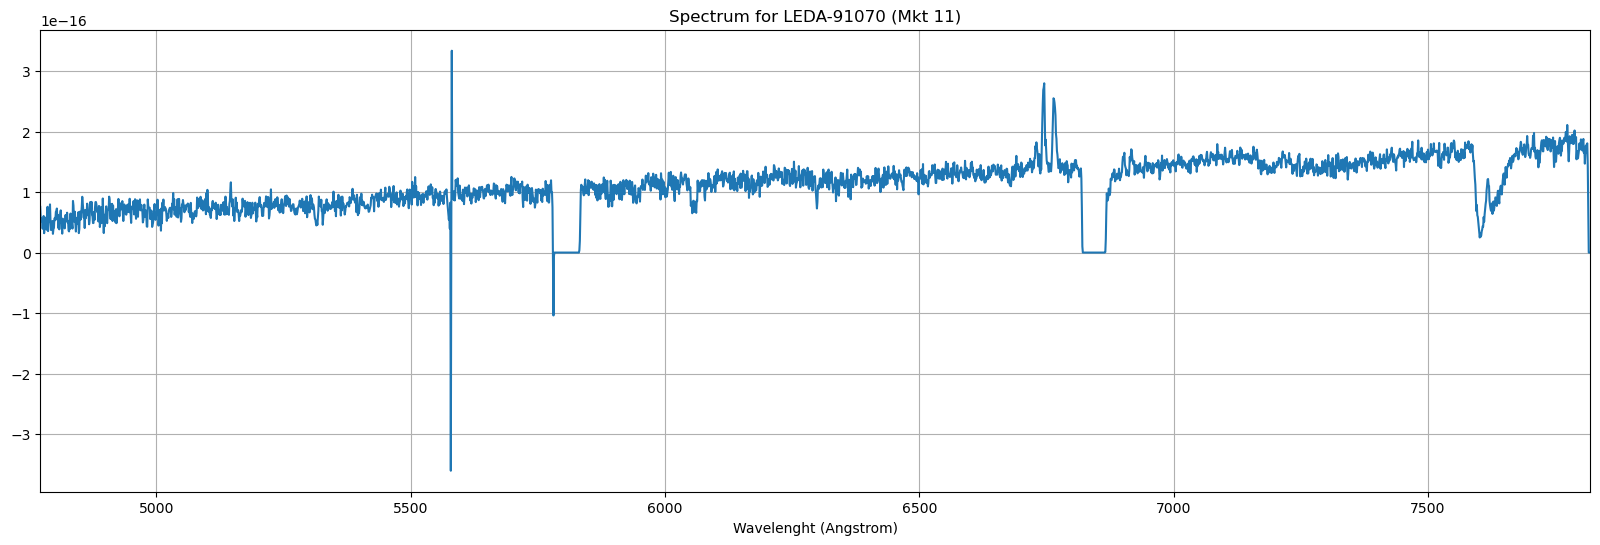

In [6]:
l=np.linspace(4772, 7819, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_leda)
plt.title("Spectrum for LEDA-91070 (Mkt 11)")
plt.xlabel("Wavelenght (Angstrom)")
plt.xlim(l[0], l[3171])
plt.grid()
#plt.savefig('013spec.pdf',  bbox_inches='tight')

0.02786311741065046


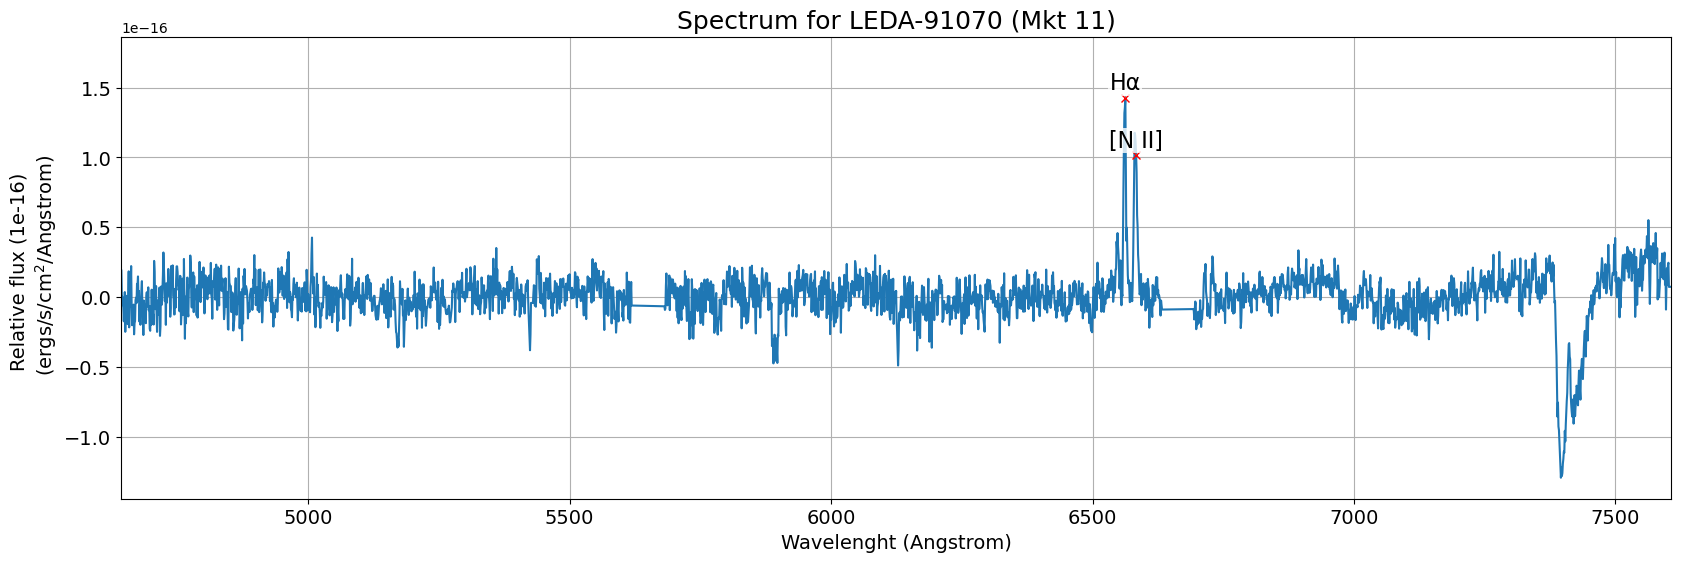

In [7]:
gal = np.copy(data_leda)
sigma = np.copy(data_ledasig)

real,galnorm,snr,z,noise = st.normz(gal,sigma,l,expected_lines)

sn_threshold = 6
line_peaks, line_properties = find_peaks(snr, height=sn_threshold, prominence=1.0,width=5) 

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(real, galnorm)
st.plotpeaks(ax,real, galnorm, line_peaks,linenames, linelist)
ax.plot(real, galnorm*0.5+1e-16, color = '#ffffff00')
#dogauss(real, galnorm, line_peaks)
ax.set_xlim(real[0], real[-1])
plt.title("Spectrum for LEDA-91070 (Mkt 11)", fontsize = 18)
ax.tick_params(axis='both', labelsize=14)
plt.xlabel("Wavelenght (Angstrom)", fontsize = 14)
plt.ylabel('Relative flux (1e-16) \n (ergs/s/cm$^2$/Angstrom)', fontsize = 14)
plt.grid();
#plt.savefig('Mkt11spec.png',  bbox_inches='tight')
print(z)

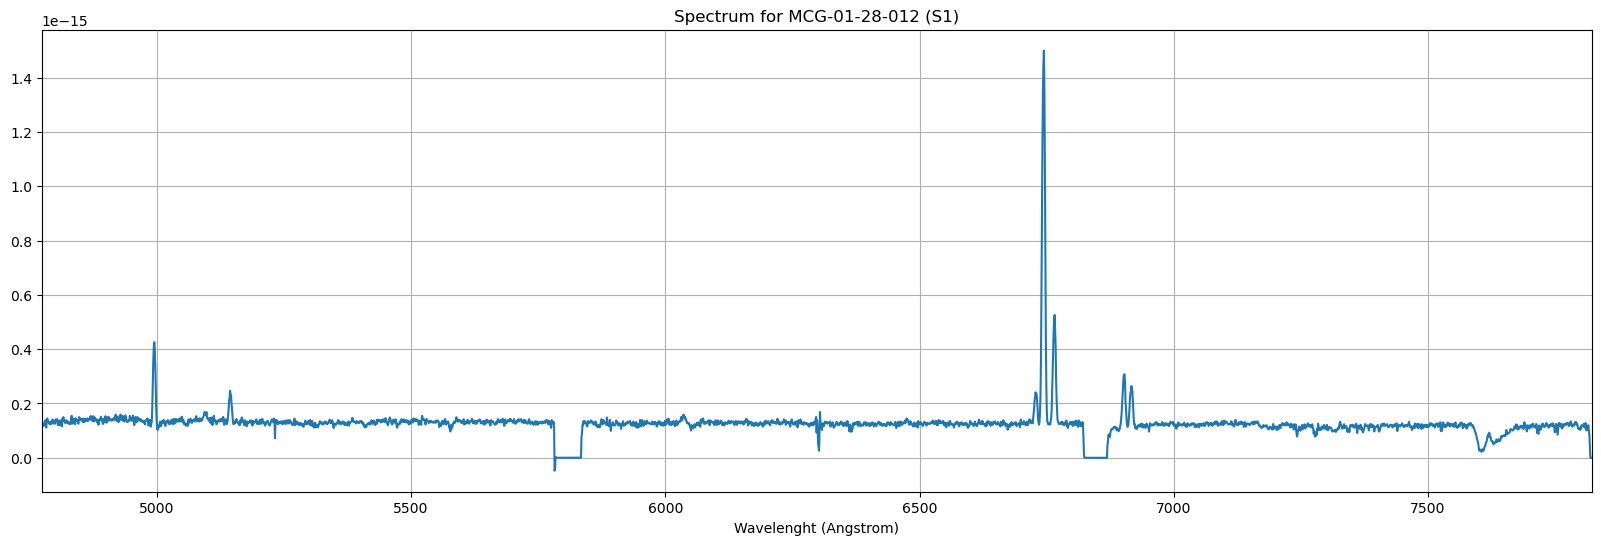

In [8]:
l=np.linspace(4774, 7822, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_012)
plt.title("Spectrum for MCG-01-28-012 (S1)")
plt.xlabel("Wavelenght (Angstrom)")
plt.xlim(4774, 7822)
plt.grid()
#plt.savefig('013spec.pdf',  bbox_inches='tight')

0.027680711236256098


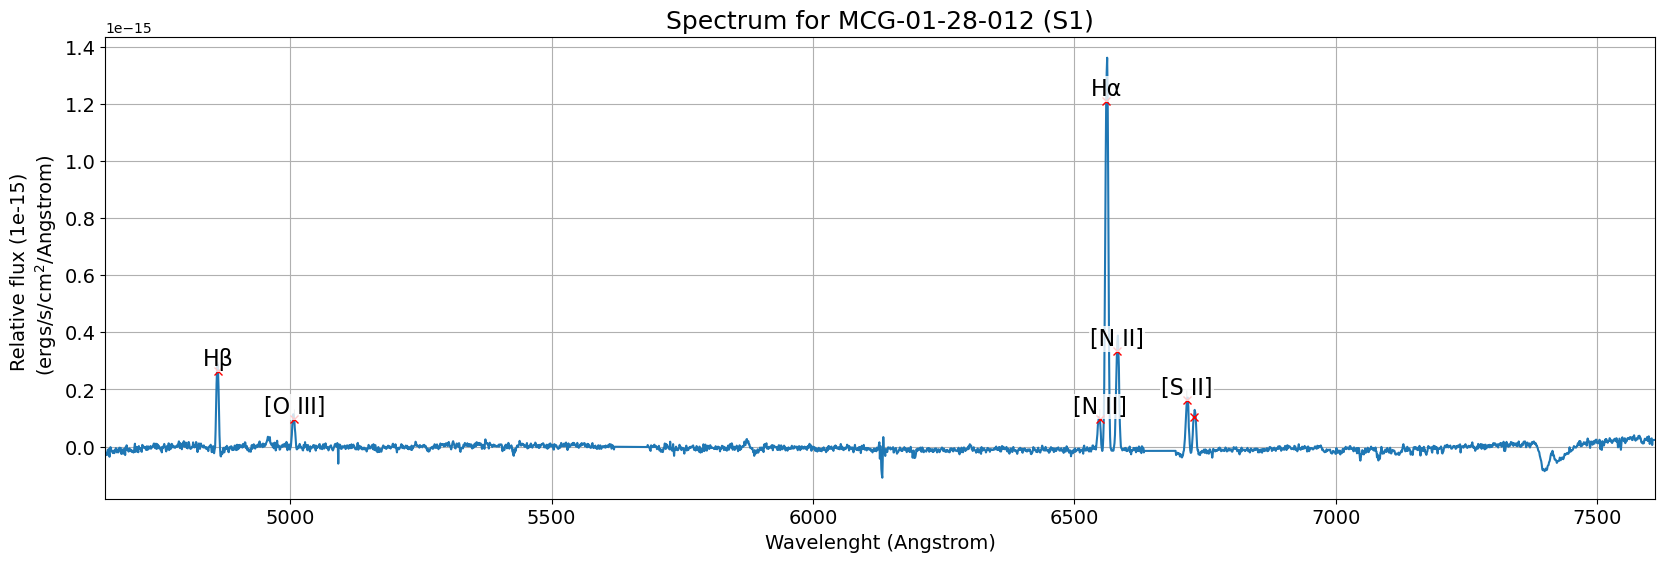

In [9]:
gal = np.copy(data_012)
sigma = np.copy(data_012sig)

real,galnorm,snr,z,noise = st.normz(gal,sigma,l,expected_lines)

sn_threshold = 4 
line_peaks, line_properties = find_peaks(snr, height=sn_threshold, prominence=1.0,width=4) 

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(real, galnorm)
#ax.plot(real, snr)
#ax.plot(real, abs_snr)
#ax.plot(real, noise)
#ax.plot(real, galnorm*0.5+1e-16, color = '#ffffff00')
st.plotpeaks(ax,real, galnorm, line_peaks,linenames, linelist)
#dogauss(real, galnorm, line_peaks)
plt.title("Spectrum for MCG-01-28-012 (S1)", fontsize = 18)
ax.tick_params(axis='both', labelsize=14)
plt.xlabel("Wavelenght (Angstrom)", fontsize = 14)
plt.ylabel('Relative flux (1e-15) \n (ergs/s/cm$^2$/Angstrom)', fontsize = 14)
plt.grid()
ax.set_xlim(real[0], real[-1]);
#plt.savefig('S1spec.png',  bbox_inches='tight')
print(z)

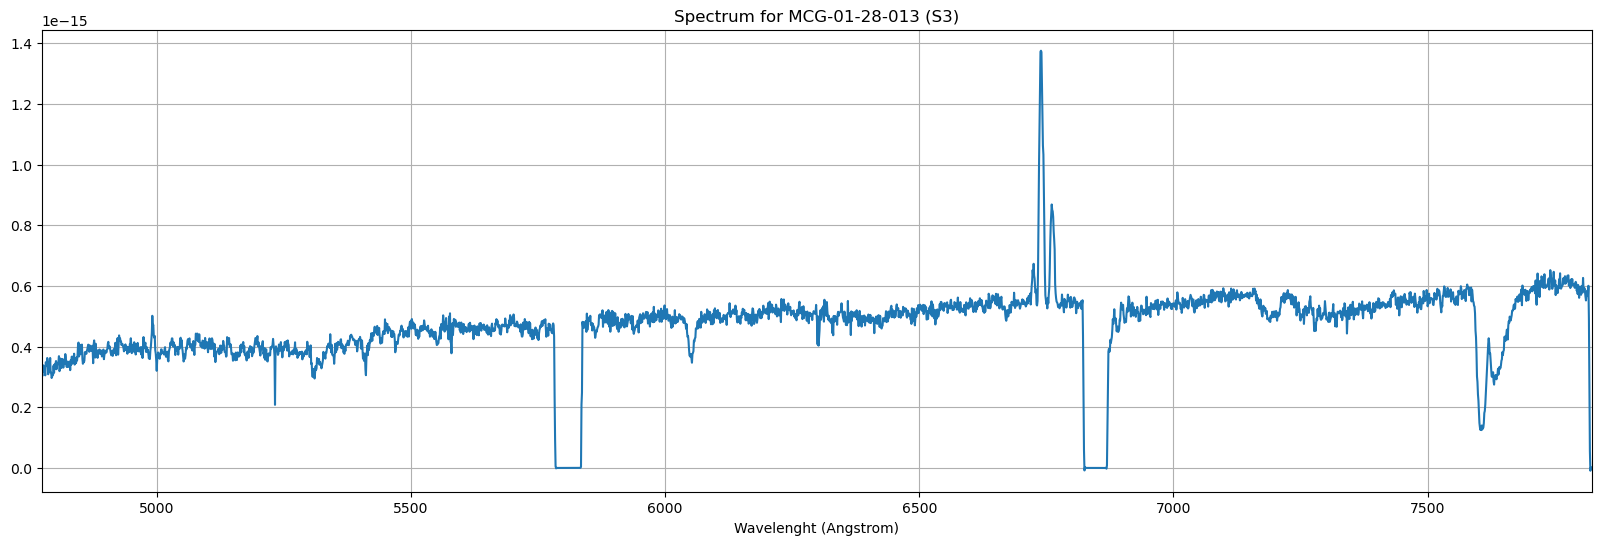

In [10]:
l=np.linspace(4774, 7823, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_013)
plt.title("Spectrum for MCG-01-28-013 (S3)")
plt.xlabel("Wavelenght (Angstrom)")
plt.xlim(4774, 7823)
plt.grid()
#plt.savefig('013spec.pdf',  bbox_inches='tight')

0.026900151200201873


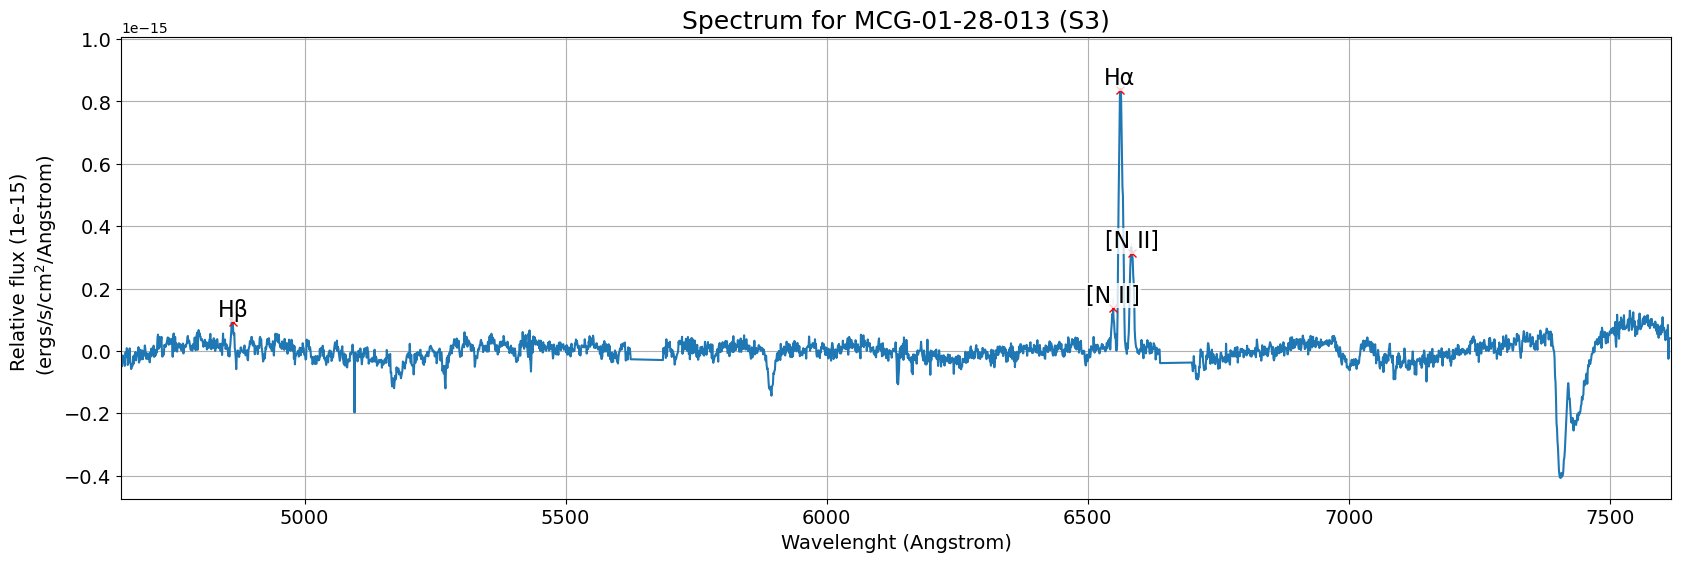

In [11]:
gal = np.copy(data_013)
sigma = np.copy(data_013sig)

real,galnorm,snr,z,noise = st.normz(gal,sigma,l,expected_lines)

sn_threshold = 8 
line_peaks, line_properties = find_peaks(snr, height=sn_threshold, prominence=1.0,width=5) 

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(real, galnorm)
ax.plot(real, galnorm+1e-16, color = '#ffffff00')
st.plotpeaks(ax,real, galnorm, line_peaks,linenames, linelist)
#dogauss(real, galnorm, line_peaks)
ax.set_xlim(real[0], real[-1]);
plt.title("Spectrum for MCG-01-28-013 (S3)", fontsize = 18)
ax.tick_params(axis='both', labelsize=14)
plt.xlabel("Wavelenght (Angstrom)", fontsize = 14)
plt.ylabel('Relative flux (1e-15) \n (ergs/s/cm$^2$/Angstrom)', fontsize = 14)
plt.grid()
#plt.savefig('S3spec.png',  bbox_inches='tight')
print(z)

(4774.0, 7822.0)

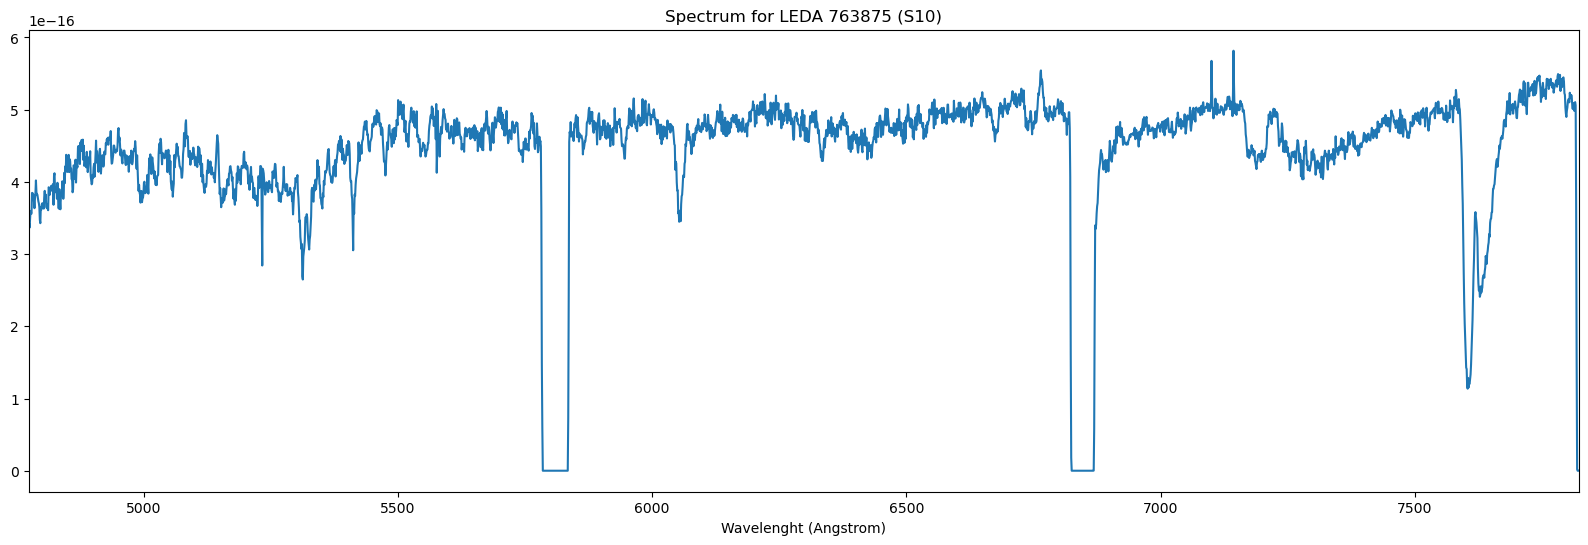

In [12]:
l=np.linspace(4774, 7822, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_s8)
plt.title("Spectrum for LEDA 763875 (S10)")
plt.xlabel("Wavelenght (Angstrom)")
plt.xlim(4774, 7822)
#plt.savefig('013spec.pdf',  bbox_inches='tight')

0.02690427272792764


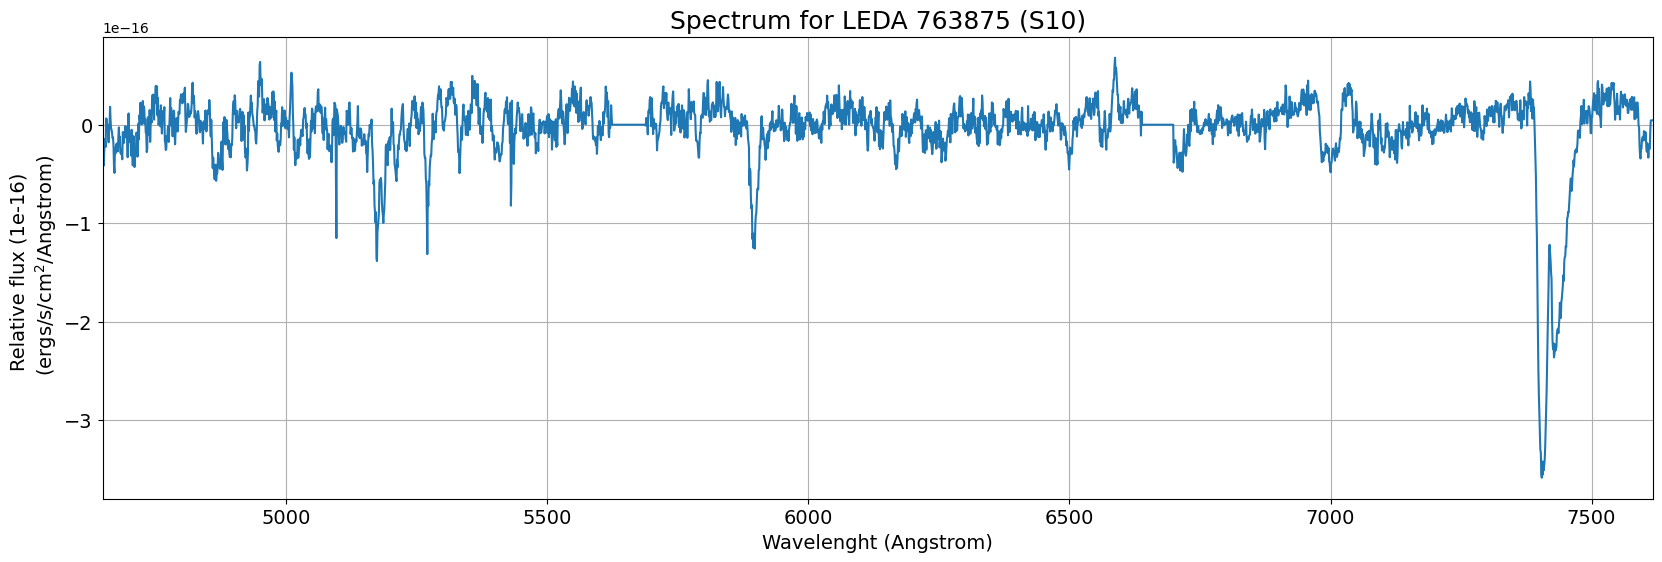

In [13]:
gal = np.copy(data_s8)
sigma = np.copy(data_s8sig)

m, c = np.polyfit(l, gal, 1)
y2 = m*l + c
gal2 = np.copy(gal)

for i in range(len(l)):
    if (l[i] < 5840 and l[i] > 5775) or (l[i] > 6817 and l[i] < 6880):
        gal2[i] = y2[i]
        gal[i] = y2[i]

    if (gal[i] <= 3.5e-16):
        gal2[i] = y2[i]
        if (l[i] > 7500):
            for j in range(2):
                gal2[i-(1+j)] = y2[i-(1+j)]
        else:
            for j in range(2):    
                gal2[i+(1+j)] = y2[i+(1+j)]
                gal2[i-(1+j)] = y2[i-(1+j)]
    if (gal[i] <= 1e-18):
        gal[i] = y2[i]
        if (l[i] > 7500):
            for j in range(2):
                gal[i-(1+j)] = y2[i-(1+j)]
        else:
            for j in range(2):    
                gal[i+(1+j)] = y2[i+(1+j)]
                gal[i-(1+j)] = y2[i-(1+j)]
                    

continuum = savgol_filter(gal2, window_length=501, polyorder=3)
galnorm = gal - continuum
                
for i in range(len(l)):
    if (l[i] < 5840 and l[i] > 5775) or (l[i] > 6817 and l[i] < 6880):
        galnorm[i] = 1e-20
    

rms = np.sqrt(np.mean(galnorm**2))

m, c = np.polyfit(l, sigma, 1)

sigy = m*l + c

sig2 = np.copy(sigma)

for i in range(len(l)):
    if (l[i] < 5840 and l[i] > 5775) or (l[i] > 6817 and l[i] < 6880):
        sig2[i] = sigy[i]
        sigma[i] = sigy[i]

    if (sigma[i] <= 3.5e-18):
        sig2[i] = sigy[i]
        if (l[i] > 7500):
            for j in range(2):
                sig2[i-(1+j)] = sigy[i-(1+j)]
        else:
            for j in range(2):    
                sig2[i+(1+j)] = sigy[i+(1+j)]
                sig2[i-(1+j)] = sigy[i-(1+j)]
    if (sigma[i] <= 1e-19):
        sigma[i] = sigy[i]
        if (l[i] > 7500):
            for j in range(2):
                sigma[i-(1+j)] = sigy[i-(1+j)]
        else:
            for j in range(2):    
                sigma[i+(1+j)] = sigy[i+(1+j)]
                sigma[i-(1+j)] = sigy[i-(1+j)]
                    

contsig = savgol_filter(sig2, window_length=501, polyorder=3)
signorm = sigma - contsig
                
for i in range(len(l)):
    if (l[i] < 5840 and l[i] > 5775) or (l[i] > 6817 and l[i] < 6880):
        signorm[i] = 1e-20
                
level = np.zeros(3172)+rms


ha = 0
hi = 0

for i in range(3172):
    if galnorm[i] < hi:
        hi = galnorm[i]
        ha = l[i]
        
z = (ha - 7404.59)/7404.59

real = l/(z+1)

rms = np.sqrt(np.mean(galnorm ** 2))
known_lines = np.array(list(expected_lines.values()))
exclusion_width = 25  # Å

mask = np.ones_like(l, dtype=bool)
for lw in known_lines:
    mask &= ~((l > lw - exclusion_width) & (l < lw + exclusion_width))

global_rms = np.sqrt(np.mean(galnorm[mask] ** 2))

window_size = 50 
squared = galnorm ** 2
rolling_rms = np.sqrt(uniform_filter1d(squared, size=window_size))

effective_noise = np.maximum(3*signorm, global_rms)
#effective_noise = 3*signorm

#for i in range(len(real)):
    #for j in range(len(known_lines)):
        #if (real[i] <= known_lines[j]*1.0005 and real[i] >= known_lines[j] - known_lines[j]*0.0005):
            #for k in range(exclusion_width):
                #effective_noise[i+k] = 3*signorm[i+k]
                #effective_noise[i-k] = 3*signorm[i+k]

snr = galnorm / effective_noise
snr = snr*2
#plt.figure(figsize=(20,6))
#plt.plot(real,gal)
#plt.plot(real,galnorm)
#plt.plot(real,y2)
#plt.plot(real,3*sigma)
#plt.plot(real,sigma)
#plt.plot(real,signorm)
#plt.plot(real,sigy)
#plt.plot(real,galnorm-(signorm*3))
#plt.plot(real,(rms+signorm*3))
#plt.plot(real, np.abs(galnorm-signorm*3))
#plt.plot(real, (np.abs(galnorm)-np.abs(signorm*3)))
#plt.plot(real, np.abs(np.abs(galnorm)-np.abs(signorm*3)))
#plt.plot(real,np.abs(galnorm-rms))
#plt.plot(real,level, color = 'red')
#plt.plot(real, snr)
#plt.plot(real, rolling_rms)
#plt.plot(real,global_rms)
#plt.plot(real, effective_noise)
#plt.xlim(real[0], real[3171])

sn_threshold = 4 

line_peaks, line_properties = find_peaks(snr/2, height=sn_threshold, prominence=1.0,width=4) 

abs_snr = - snr
abs_peaks, abs_props = find_peaks(abs_snr, height = sn_threshold, prominence=1.0, width=4)

for i in range(len(real)):
    if real[i] >= 7612:
        galnorm[i] = 0
    
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(real, galnorm-1.7*signorm)
#ax.plot(real,snr)
#ax.plot(real, gal*0.5, color = '#ffffff00')
st.plotpeaks(ax,real, galnorm, line_peaks,linenames, linelist)
#plotpeaks(real, galnorm, abs_peaks)
#dogauss(real, galnorm, line_peaks)
ax.set_xlim(real[0], real[-1])
plt.title("Spectrum for LEDA 763875 (S10)", fontsize = 18)
ax.tick_params(axis='both', labelsize=14)
plt.xlabel("Wavelenght (Angstrom)", fontsize = 14)
plt.ylabel('Relative flux (1e-16) \n (ergs/s/cm$^2$/Angstrom)', fontsize = 14)
plt.grid()
#plt.savefig('S10spec.png',  bbox_inches='tight')
print(z)

(4773.0, 7823.0)

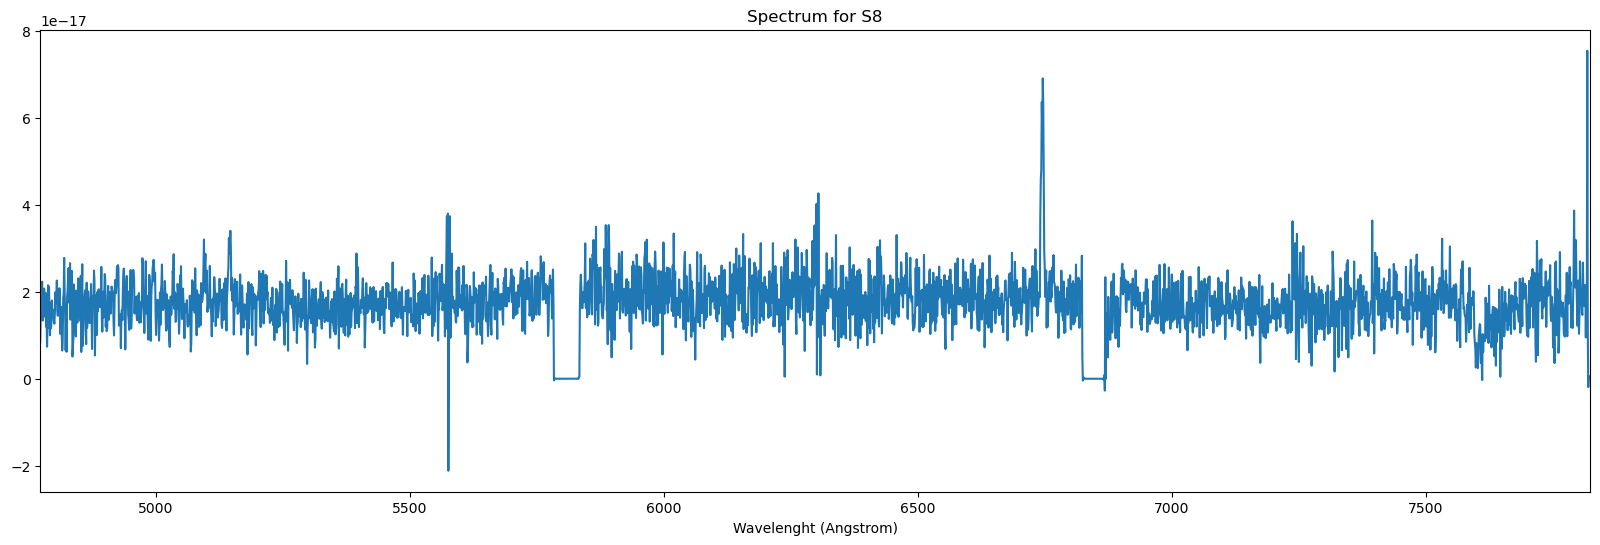

In [14]:
l=np.linspace(4773, 7823, num=3172)
plt.figure(figsize=(20,6))
plt.plot(l,data_s10)
plt.title("Spectrum for S8")
plt.xlabel("Wavelenght (Angstrom)")
plt.xlim(4773, 7823)
#plt.savefig('013spec.pdf',  bbox_inches='tight')

0.027871910964368616


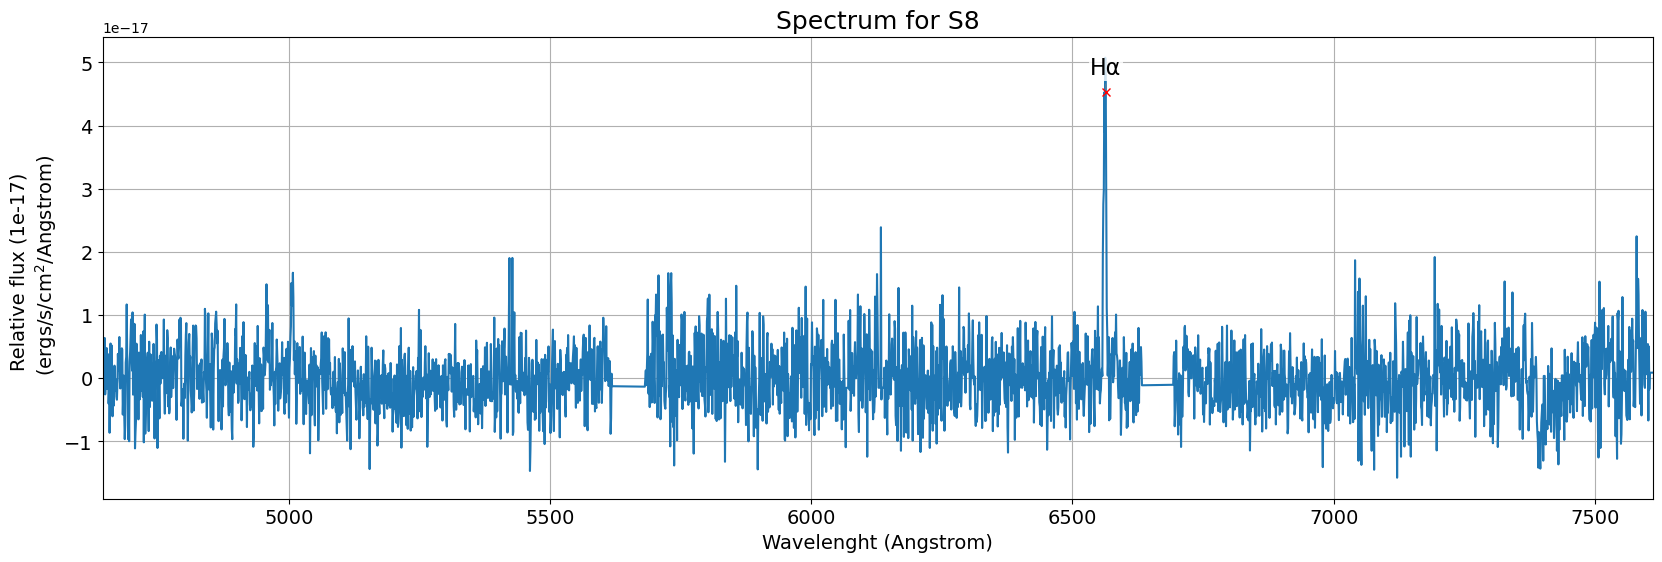

In [15]:
gal = np.copy(data_s10)
sigma = np.copy(data_s10sig)

real,galnorm,snr,z,noise = st.normz(gal,sigma,l,expected_lines)

sn_threshold = 4 
line_peaks, line_properties = find_peaks(snr, height=sn_threshold, prominence=1.0,width=5) 

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(real, galnorm)
st.plotpeaks(ax,real, galnorm, line_peaks,linenames, linelist)
#dogauss(real, galnorm, line_peaks)
ax.set_xlim(real[0], real[-1]);
plt.title("Spectrum for S8", fontsize = 18)
ax.tick_params(axis='both', labelsize=14)
plt.xlabel("Wavelenght (Angstrom)", fontsize = 14)
plt.ylabel('Relative flux (1e-17) \n (ergs/s/cm$^2$/Angstrom)', fontsize = 14)
plt.grid()
#plt.savefig('S8spec.png',  bbox_inches='tight')
print(z)